In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A=np.arange(1,5).reshape(2,2)
B=np.arange(5,9).reshape(2,2)

In [3]:
A.mean(axis=0),A

(array([2., 3.]),
 array([[1, 2],
        [3, 4]]))

In [4]:
np.concat((A,B),axis=0) # also np.concatenate

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [5]:
np.vstack((A,B)) #np.row_stack((A,B))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [6]:
np.hstack((A,B)) # also np.col_stack((A,B))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [7]:
X=np.array([10,2,3,4,-1,4])

In [8]:
np.argmax(X),np.max(X)  # arg max will find out the first max value

(np.int64(0), np.int64(10))

In [9]:
X.argmin(),np.min(X)

(np.int64(4), np.int64(-1))

In [10]:
np.sort(X),np.argsort(X)
# all work in higer dimesnion as well and sort will happen wrt to axis = 1

(array([-1,  2,  3,  4,  4, 10]), array([4, 1, 2, 3, 5, 0]))

In [11]:
np.array_equal(A,B)

False

In [12]:
np.allclose(A,B,rtol=0,atol=1e-2)  # for some type of

False

In [13]:
from keras.datasets import mnist

KeyboardInterrupt: 

In [ ]:
train,test=mnist.load_data()

In [ ]:
X,y=train

In [ ]:
plt.imshow(X[y==2][0],cmap='gray')

In [ ]:
X=X.reshape(60000,-1)

In [ ]:
X.shape

In [ ]:
#pca with toy dataset
rng=np.random.default_rng(seed=1)
r=rng.multivariate_normal([2,5],[[1,0.9],[0.9,1]],100).T
r.shape

In [ ]:
plt.scatter(r[0],r[1])
plt.axhline()
plt.axvline()

In [ ]:
r=r-r.mean(axis=1).reshape(2,-1)

In [ ]:
r.mean(axis=1).reshape(2,-1)

In [ ]:
# x=np.array([[1,2,3],[4,5,6]])
# a=x.mean(axis=1)
# x-a.reshape(2,-1)

In [ ]:
C=r@r.T/r.shape[1]

In [ ]:
eval,eigvec=np.linalg.eigh(C)

In [ ]:
plt.scatter(r[0],r[1])
x=np.linspace(-2,2)
w1=eigvec[:,-1]
w2=eigvec[:,-2]

y1=w1[1]/w1[0]*x
y2=w2[1]/w2[0]*x
plt.plot(x,y1,color='red',label='w1')
plt.plot(x,y2,color='green',label='w2')
plt.legend()
plt.axhline(color='black',linestyle='--')
plt.axvline(color='black',linestyle='--')
plt.axis('equal')

In [ ]:
np.unique(y)

In [ ]:
d1=X[y==0][:2000]
d2=X[y==1][:2000]
y1=y[y==0][:2000]
y2=y[y==1][:2000]

In [ ]:
d1=d1.reshape(2000,-1)
d2=d2.reshape(2000,-1)

In [ ]:
X=np.vstack((d1,d2)).T
y=np.concatenate((y1,y2))

In [ ]:
X.shape,y.shape

In [ ]:
def PCA(X):
  d,n=X.shape
  X=X-X.mean(axis=1).reshape(d,1)
  C=X@X.T/n
  eigval,eigvec=np.linalg.eigh(C)
  eigenval=np.flip(eigval)
  eigenvec=np.flip(eigvec,axis=1)
  return eigenval,eigenvec

In [ ]:
eigval,eigvec=PCA(X)
W=eigvec[:,:2]
Y=(W.T@X)

In [ ]:
# err=np.linalg.norm(X-Y)
# err
W.shape,X.shape

In [ ]:
colors=np.array(['red','green'])
plt.scatter(Y[0],Y[1],c=colors[y],alpha=0.5)
# plt.axhline(color='black',linestyle='--')
# plt.axvline(color='black',linestyle='--')

In [14]:
rng=np.random.default_rng(seed=42)
mus=np.array([[-3,3],
             [3,-3],
             [3,3]])

cov=np.eye(2)

n=60

X=np.concat([rng.multivariate_normal(mus[i],cov,n//3) for i in range(3)],axis=0).T

In [15]:
X.shape

(2, 60)

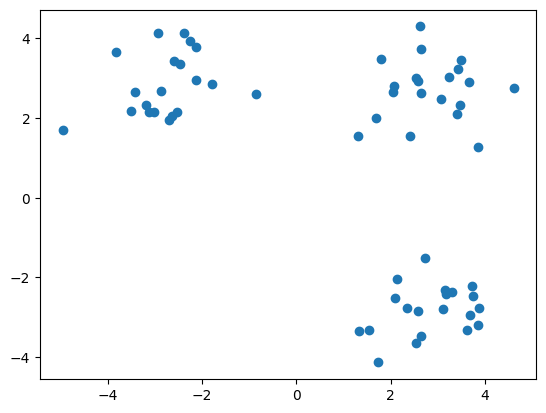

In [16]:
plt.scatter(X[0],X[1])

In [20]:
def k_means(X,k=3):
  d,n=X.shape
  ind=rng.choice(np.arange(n),k,replace=False)
  mus=X[:,ind]
  print(mus)
  Z=np.zeros(n)
  Z_prev=np.ones(n)
  while not np.array_equal(Z,Z_prev):
    Z_prev=Z.copy()
    for i in range(n):
      dist=np.linalg.norm(X[:,i].reshape(d,1)-mus,axis=0)
      Z[i]=np.argmin(dist)
    for j in range(k):
      if np.any(Z==j):
        mus[:,j]=X[:,Z==j].mean(axis=1)
  return Z,mus

In [24]:
Z,mus=k_means(X)
Z
X[:,1].reshape(2,1)

[[ 3.07212951  1.54284418  3.85797588]
 [ 2.47050729 -3.31967122 -3.19130432]]


array([[-2.2495488 ],
       [ 3.94056472]])

In [ ]:
Z.astype(int)
color=np.array(['red','green','blue'])
plt.scatter(X[0],X[1],c=color[Z.astype(int)])
plt.scatter(mus[0],mus[1],c='black',marker='x')